In [388]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder

### 1. Data Collection

In [389]:
# Load the dataset
df = pd.read_csv("housing_data.csv")

In [390]:
# DataSet 
df.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [391]:
df.tail()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1455        1455       SC60       RL           62     7917   Pave   NaN   
1456        1456       SC20       RL           85    13175   Pave   NaN   
1457        1457       SC70       RL           66     9042   Pave   NaN   
1458        1458       SC20       RL           68     9717   Pave   NaN   
1459        1459       SC20       RL           75     9937   Pave   NaN   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
1455      Reg         Lvl    AllPub  ...        0     No     No          No   
1456      Reg         Lvl    AllPub  ...        0     No  MnPrv          No   
1457      Reg         Lvl    AllPub  ...        0     No  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0     No     No          No   
1459      Reg         Lvl    AllPub  ...        0     No     No          No   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455       0    Aug   2007        WD         Normal     175000  
1456       0    Feb   2010        WD         Normal     210000  
1457    2500    May   2010        WD         Normal     266500  
1458       0    Apr   2010        WD         Normal     142125  
1459       0    Jun   2008        WD         Normal     147500  

[5 rows x 81 columns]

### 2. Data Cleaning

In [392]:
# Show columns with missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

Alley          1369
MasVnrType      872
GarageYrBlt      81
Electrical        1
dtype: int64


In [393]:
# # Drop columns with more than 80% missing values
drop_cols = missing[missing > 0.8 * len(df)].index.tolist()
print("drop columns",drop_cols)
df.drop(columns=drop_cols, inplace=True)
print(df.columns.tolist())

drop columns ['Alley']
['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'

In [394]:
#drop propert Id
df = df.drop('Unnamed: 0',axis=1)

In [395]:
# # Fill numeric columns with mean
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(num_cols)
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']


C:\Users\mohan\AppData\Local\Temp\ipykernel_11828\3252248368.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [396]:
# # Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(cat_cols)
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']


C:\Users\mohan\AppData\Local\Temp\ipykernel_11828\3215846245.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [397]:
# # Confirm all missing values handled
print("✅ Missing values after cleaning:", df.isnull().sum().sum())

✅ Missing values after cleaning: 0


In [398]:
# DataSet 
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0       SC60       RL           65     8450   Pave      Reg         Lvl   
1       SC20       RL           80     9600   Pave      Reg         Lvl   
2       SC60       RL           68    11250   Pave      IR1         Lvl   
3       SC70       RL           60     9550   Pave      IR1         Lvl   
4       SC60       RL           84    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... PoolArea PoolQC Fence MiscFeature  \
0    AllPub    Inside       Gtl  ...        0     No    No          No   
1    AllPub       FR2       Gtl  ...        0     No    No          No   
2    AllPub    Inside       Gtl  ...        0     No    No          No   
3    AllPub    Corner       Gtl  ...        0     No    No          No   
4    AllPub       FR2       Gtl  ...        0     No    No          No   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0       0     Feb    2008        WD         Normal    208500  
1       0     May    2007        WD         Normal    181500  
2       0     Sep    2008        WD         Normal    223500  
3       0     Feb    2006        WD        Abnorml    140000  
4       0     Dec    2008        WD         Normal    250000  

[5 rows x 79 columns]

### 3. Univariate Analysis

In [399]:
df['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [400]:
df_2008 = df.loc[df['YrSold']==2008]
df_2008[['YrSold','SalePrice']].head()

YrSold  SalePrice
0    2008     208500
2    2008     223500
4    2008     250000
8    2008     129900
9    2008     118000

In [401]:
df_2007 = df.loc[df['YrSold']==2007]
df_2006 = df.loc[df['YrSold']==2006]
df_2009 = df.loc[df['YrSold']==2009]
df_2010 = df.loc[df['YrSold']==2010]

<!-- import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame with multiple categorical columns
data = {
    'Neighborhood': ['CollgCr', 'Veenker', 'CollgCr', 'Crawfor', 'NoRidge'],
    'HouseStyle': ['2Story', '1Story', '2Story', '2Story', '1Story'],
    'SaleCondition': ['Normal', 'Abnorml', 'Normal', 'Partial', 'Abnorml']
}

df = pd.DataFrame(data)

# Initialize an empty dictionary to store LabelEncoders
label_encoders = {}

# Loop through each column to encode
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for possible inverse_transform later

print(df) -->


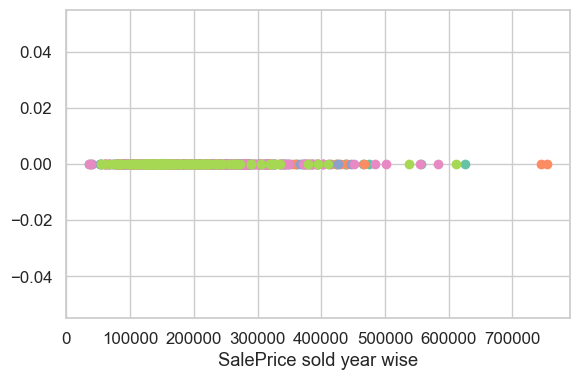

In [402]:

plt.figure(figsize=(6, 4))
# plt.plot(df['SalePrice'], np.zeros_like(df['SalePrice']),'o')
plt.plot(df_2006['SalePrice'], np.zeros_like(df_2006['SalePrice']),'o')
plt.plot(df_2007['SalePrice'], np.zeros_like(df_2007['SalePrice']),'o')
plt.plot(df_2008['SalePrice'], np.zeros_like(df_2008['SalePrice']),'o')
plt.plot(df_2009['SalePrice'], np.zeros_like(df_2009['SalePrice']),'o')
plt.plot(df_2010['SalePrice'], np.zeros_like(df_2010['SalePrice']),'o')
plt.xlabel('SalePrice sold year wise')
plt.tight_layout()
plt.show()

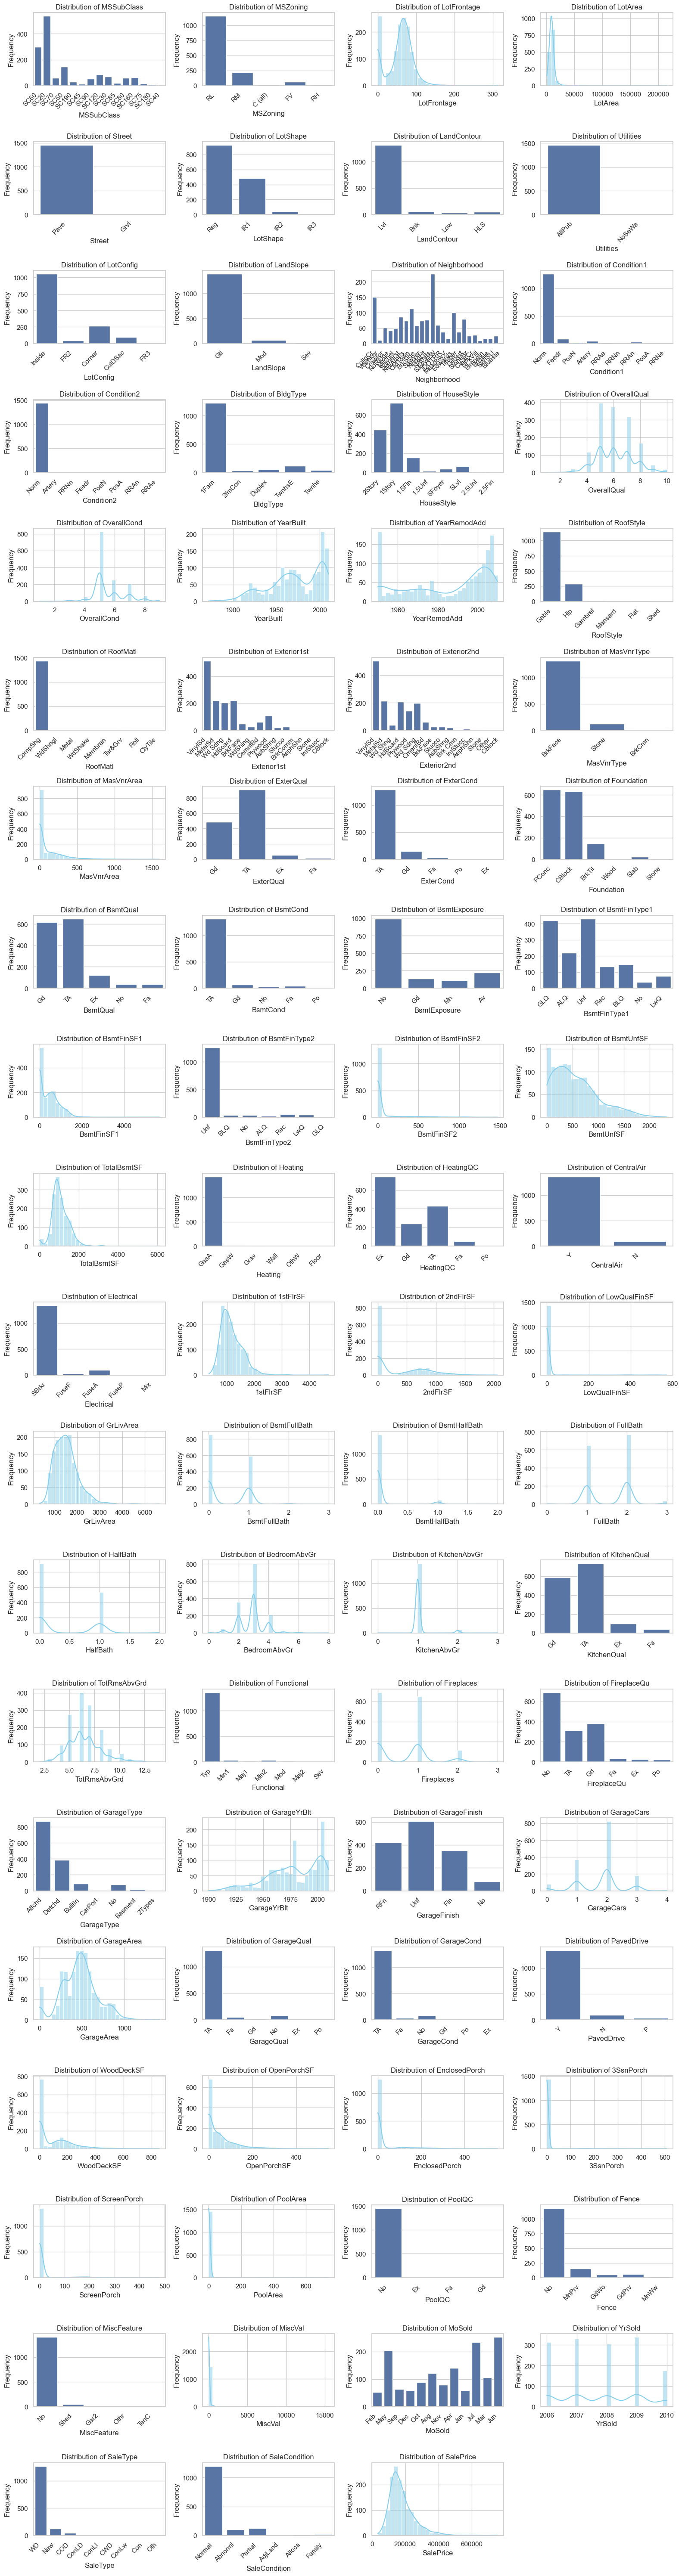

In [403]:
# Set Seaborn style
sns.set(style="whitegrid")

# Get all column names
all_cols = df.columns.tolist()
n_cols = 4  # Number of plots per row
n_plots = len(all_cols)
n_rows = math.ceil(n_plots / n_cols)

# Set figure size
plt.figure(figsize=(4 * n_cols, 3 * n_rows))

# Loop through all columns
for i, col in enumerate(all_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    if pd.api.types.is_numeric_dtype(df[col]):
        # Plot numeric data
        sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    else:
        # Plot categorical data
        sns.countplot(x=col, data=df)
        plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### 4. Bivariate Analysis

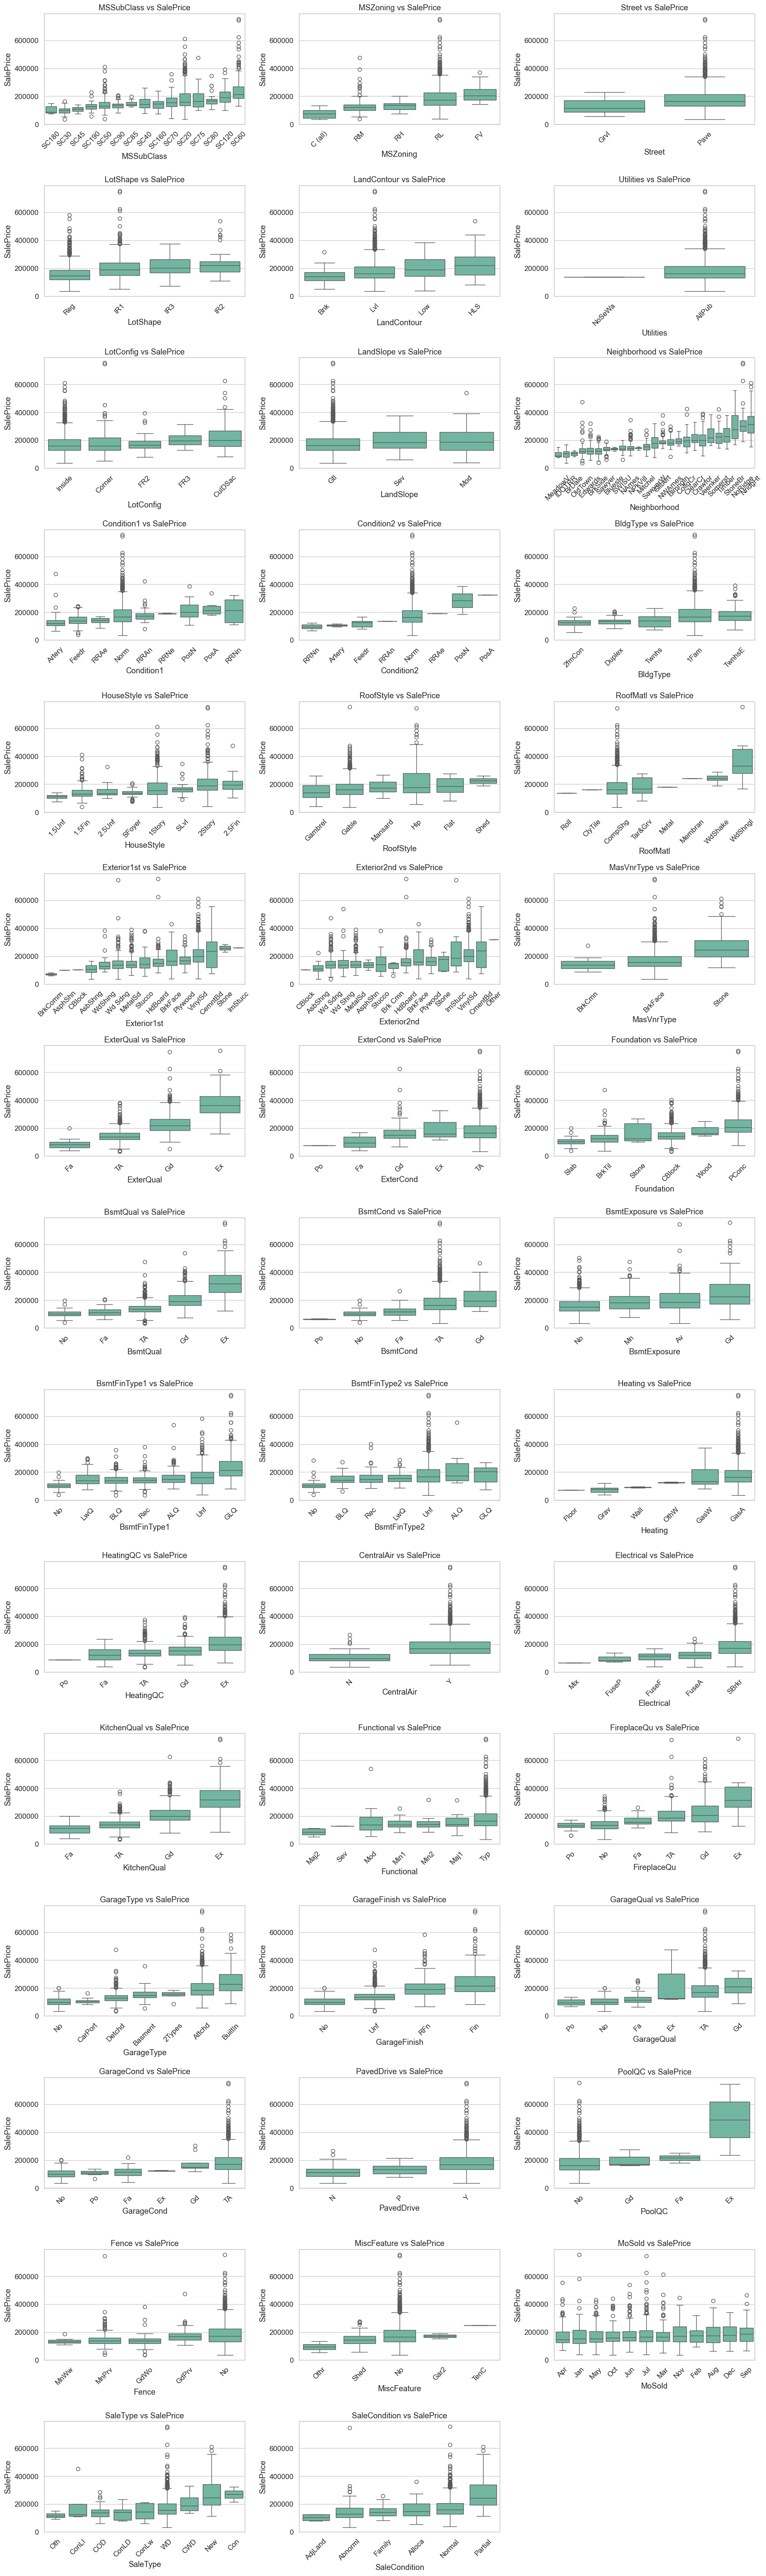

In [404]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

# Set Seaborn style
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

# Get all categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Grid setup
n_cols = 3  # Number of plots per row (you can change this)
n_plots = len(categorical_cols)
n_rows = math.ceil(n_plots / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()  # Flatten 2D array of axes for easy looping

# Plot boxplots
for i, col in enumerate(categorical_cols):
    ax = axes[i]
    order = df.groupby(col)['SalePrice'].median().sort_values().index
    sns.boxplot(data=df, x=col, y='SalePrice', order=order, ax=ax)
    ax.set_title(f"{col} vs SalePrice")
    ax.tick_params(axis='x', rotation=45)

# Hide any extra axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 5. Multivariate Analysis

In [405]:
# Initialize LabelEncoder
le = LabelEncoder()

# Loop through each column
for col in df.columns:
    # Step 1: Check if column is non-numeric
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        # Step 2: Apply LabelEncoder
        df[col] = le.fit_transform(df[col])


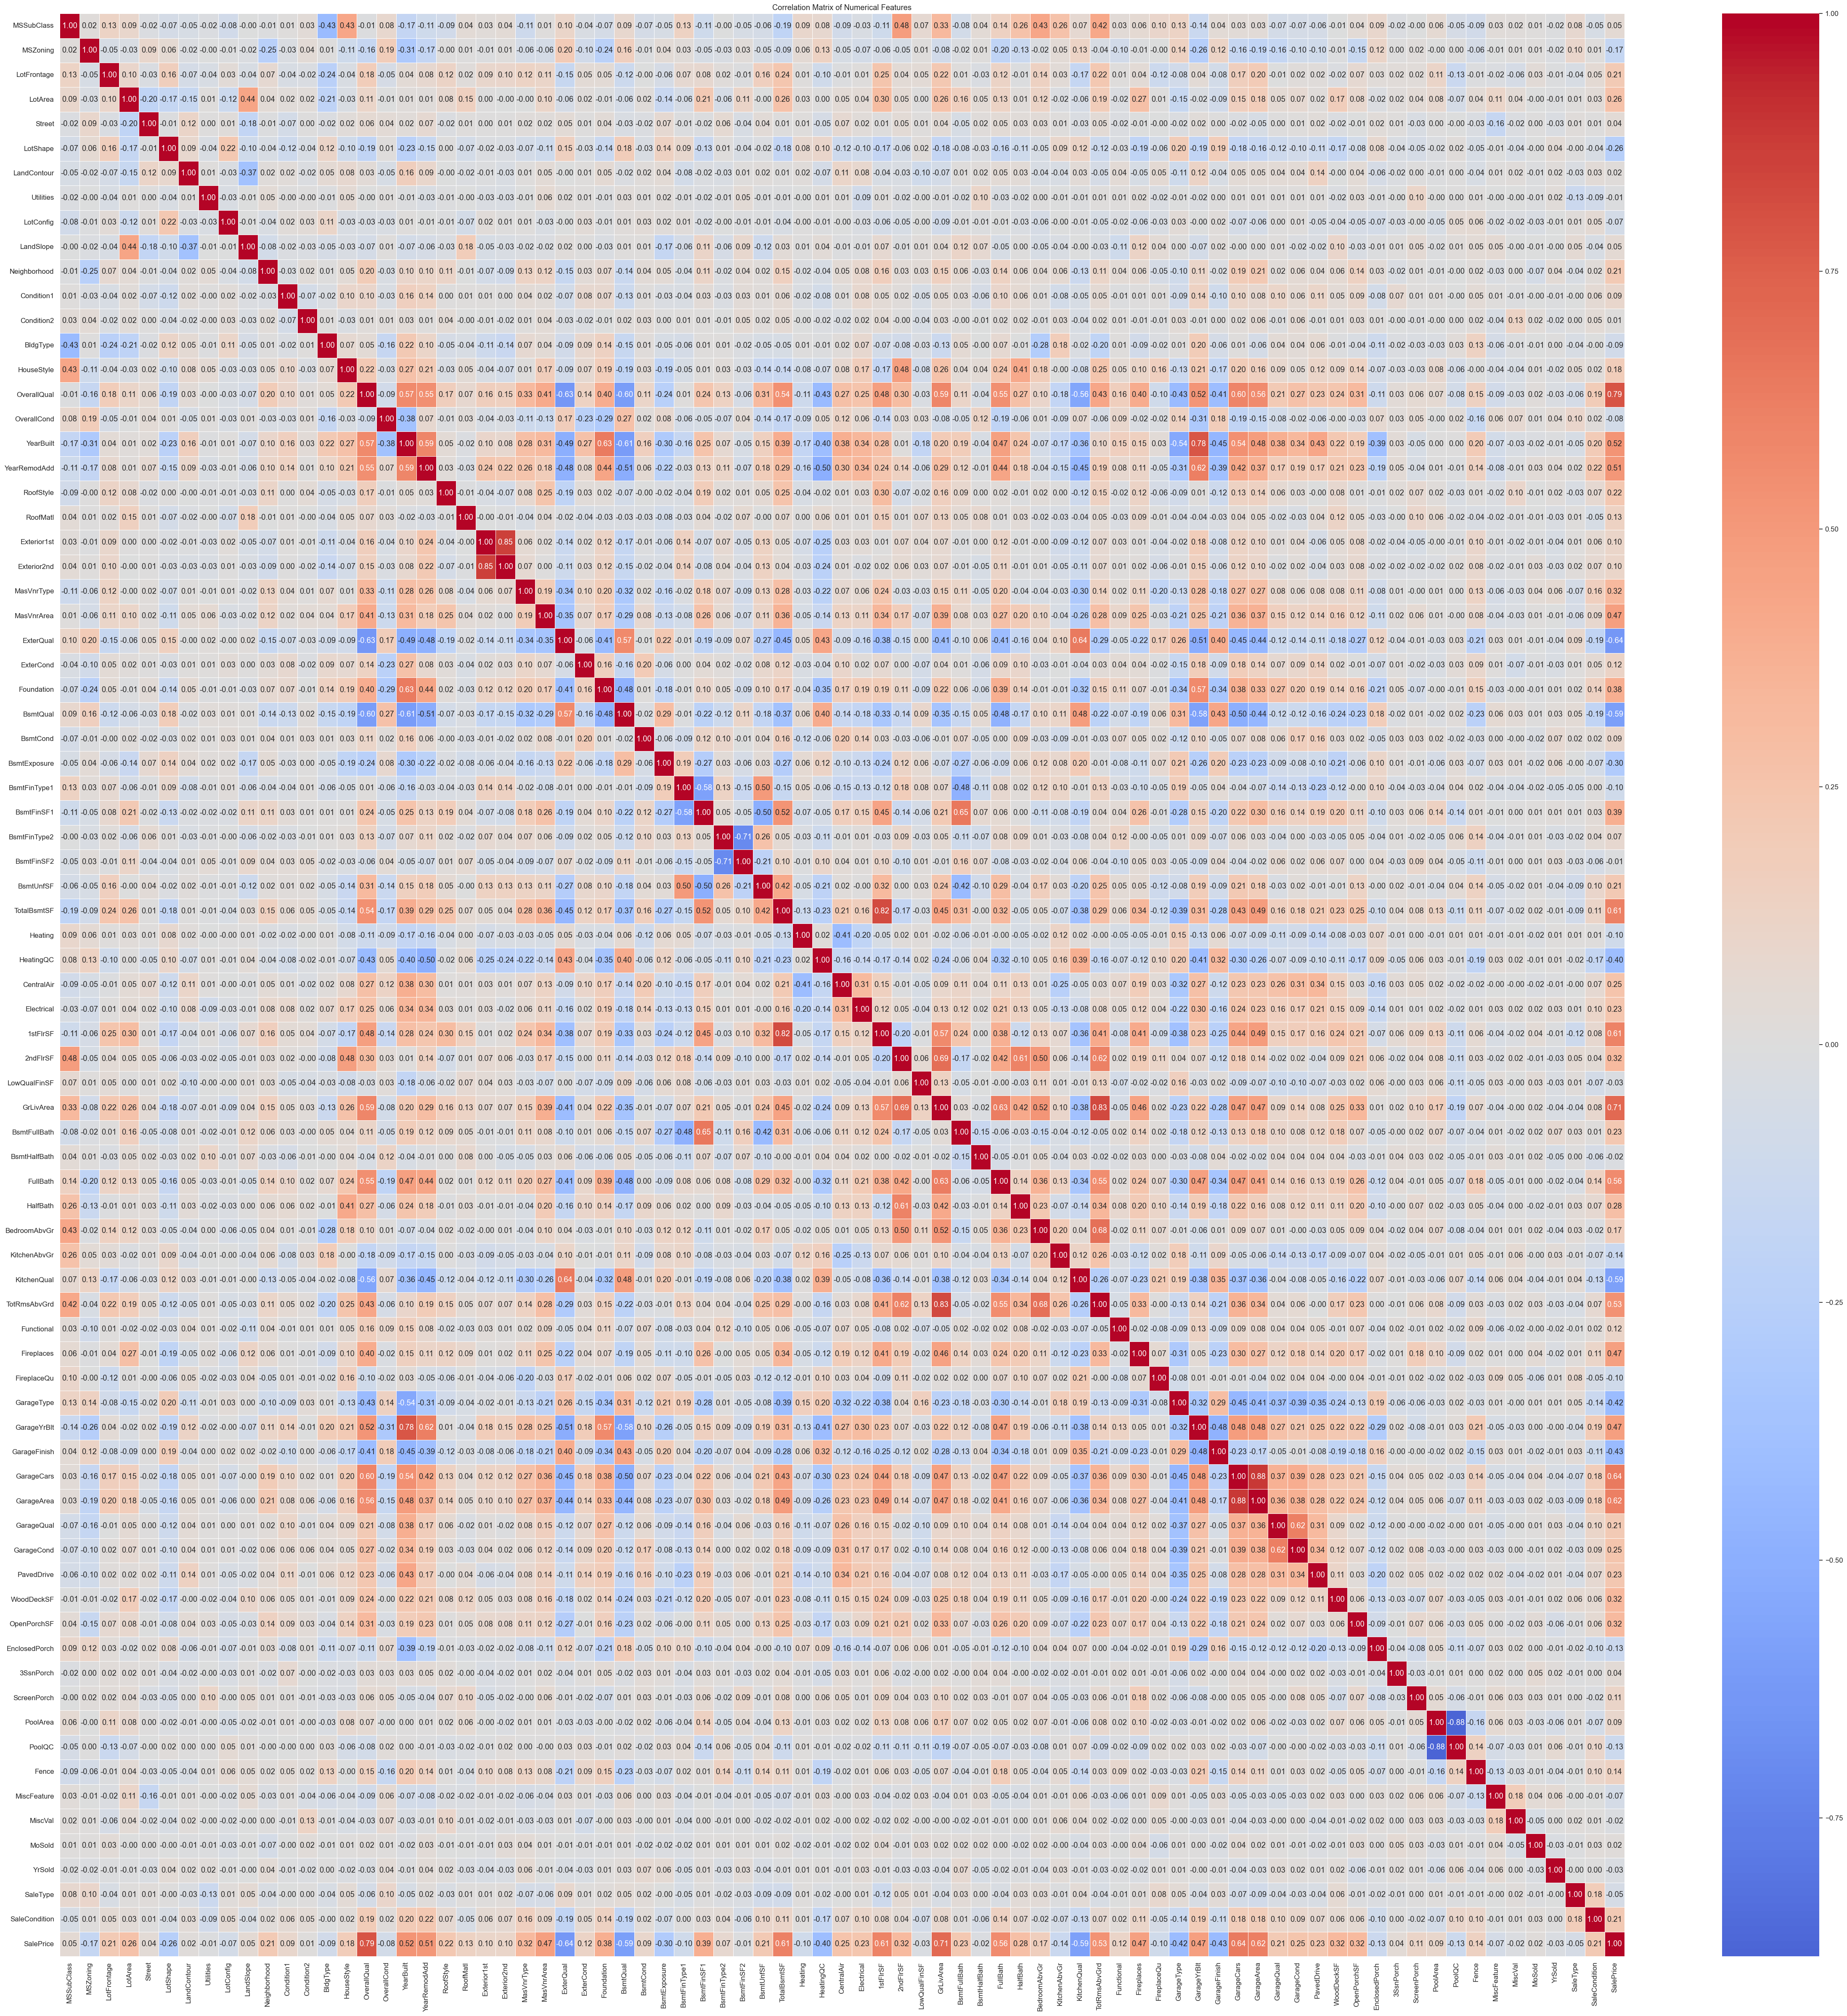

In [406]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of correlations
plt.figure(figsize=(60, 60))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()



C:\Users\mohan\AppData\Local\Temp\ipykernel_11828\2511236279.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")


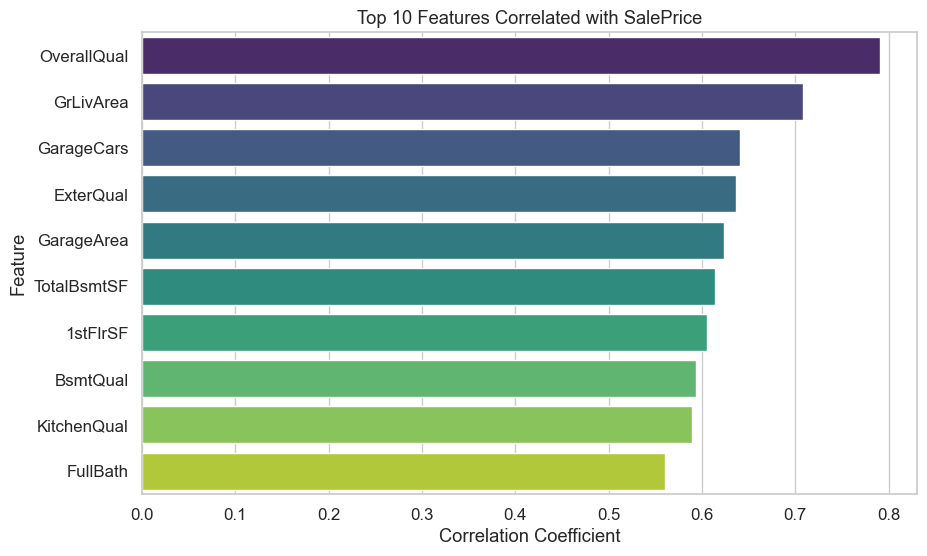

In [407]:
# ---------- 2. Correlation with SalePrice ----------
# Get top correlations with SalePrice
top_corr = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)[1:11]  # exclude itself

# Plot top correlated features with SalePrice
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")
plt.title("Top 10 Features Correlated with SalePrice")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

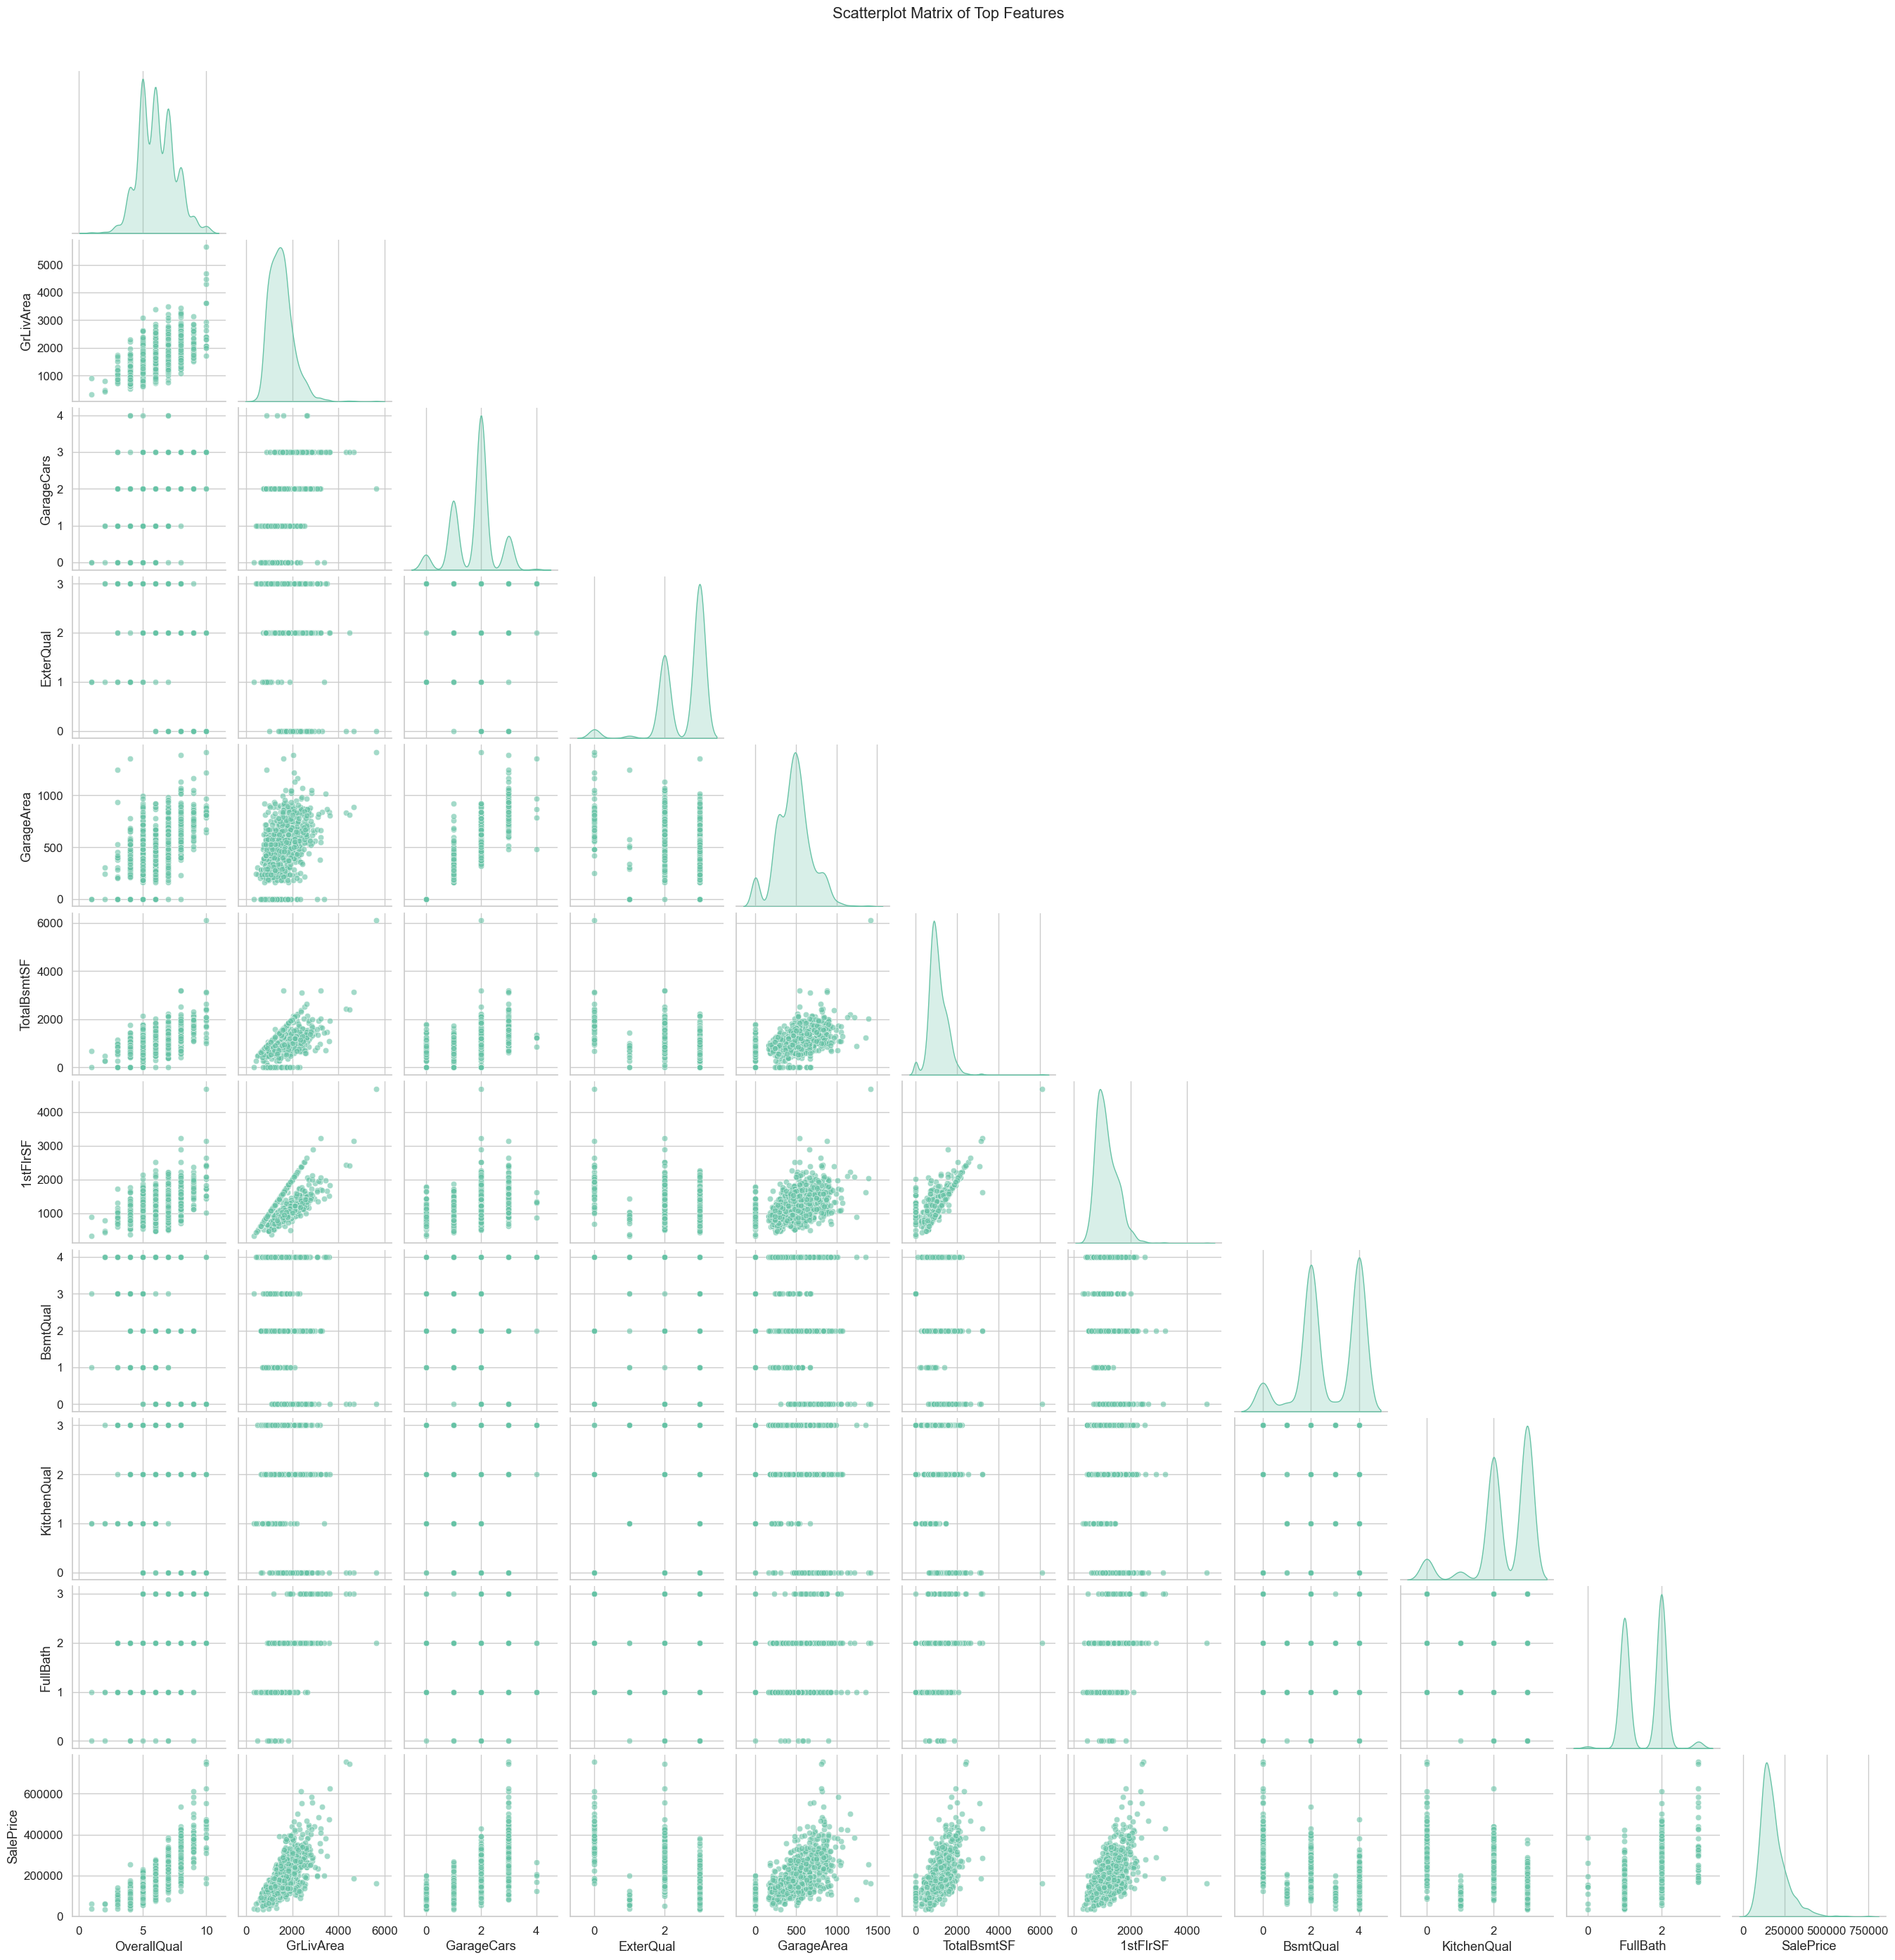

In [408]:
# ---------- 3. Scatterplot Matrix ----------
# Select top features for scatter matrix
top_features = top_corr.index.tolist() + ['SalePrice']
sns.pairplot(df[top_features], corner=True, diag_kind='kde', plot_kws={'alpha':0.6})
plt.suptitle("Scatterplot Matrix of Top Features", y=1.02)
plt.show()


### 6.Feature Engineering

In [409]:
# 1. Price per square foot
df['PricePerSqFt'] = df['SalePrice'] / df['GrLivArea']

# 2. House age at time of sale
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

# 3. Age since last remodel
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']

# 4. Total bathrooms (including basement)
df['TotalBathrooms'] = (
    df['FullBath'] + 0.5 * df['HalfBath'] +
    df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
)

# 5. Total porch square footage
df['TotalPorchSF'] = (
    df['OpenPorchSF'] + df['EnclosedPorch'] +
    df['3SsnPorch'] + df['ScreenPorch']
)

# 6. Total square footage of house
df['TotalSF'] = (
    df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
)

# Preview new features
print(df[['SalePrice', 'GrLivArea', 'PricePerSqFt', 'HouseAge', 'RemodAge', 'TotalBathrooms', 'TotalPorchSF', 'TotalSF']].head())


   SalePrice  GrLivArea  PricePerSqFt  HouseAge  RemodAge  TotalBathrooms  \
0     208500       1710    121.929825         5         5             3.5   
1     181500       1262    143.819334        31        31             2.5   
2     223500       1786    125.139978         7         6             3.5   
3     140000       1717     81.537566        91        36             2.0   
4     250000       2198    113.739763         8         8             3.5   

   TotalPorchSF  TotalSF  
0            61     2566  
1             0     2524  
2            42     2706  
3           307     2473  
4            84     3343  


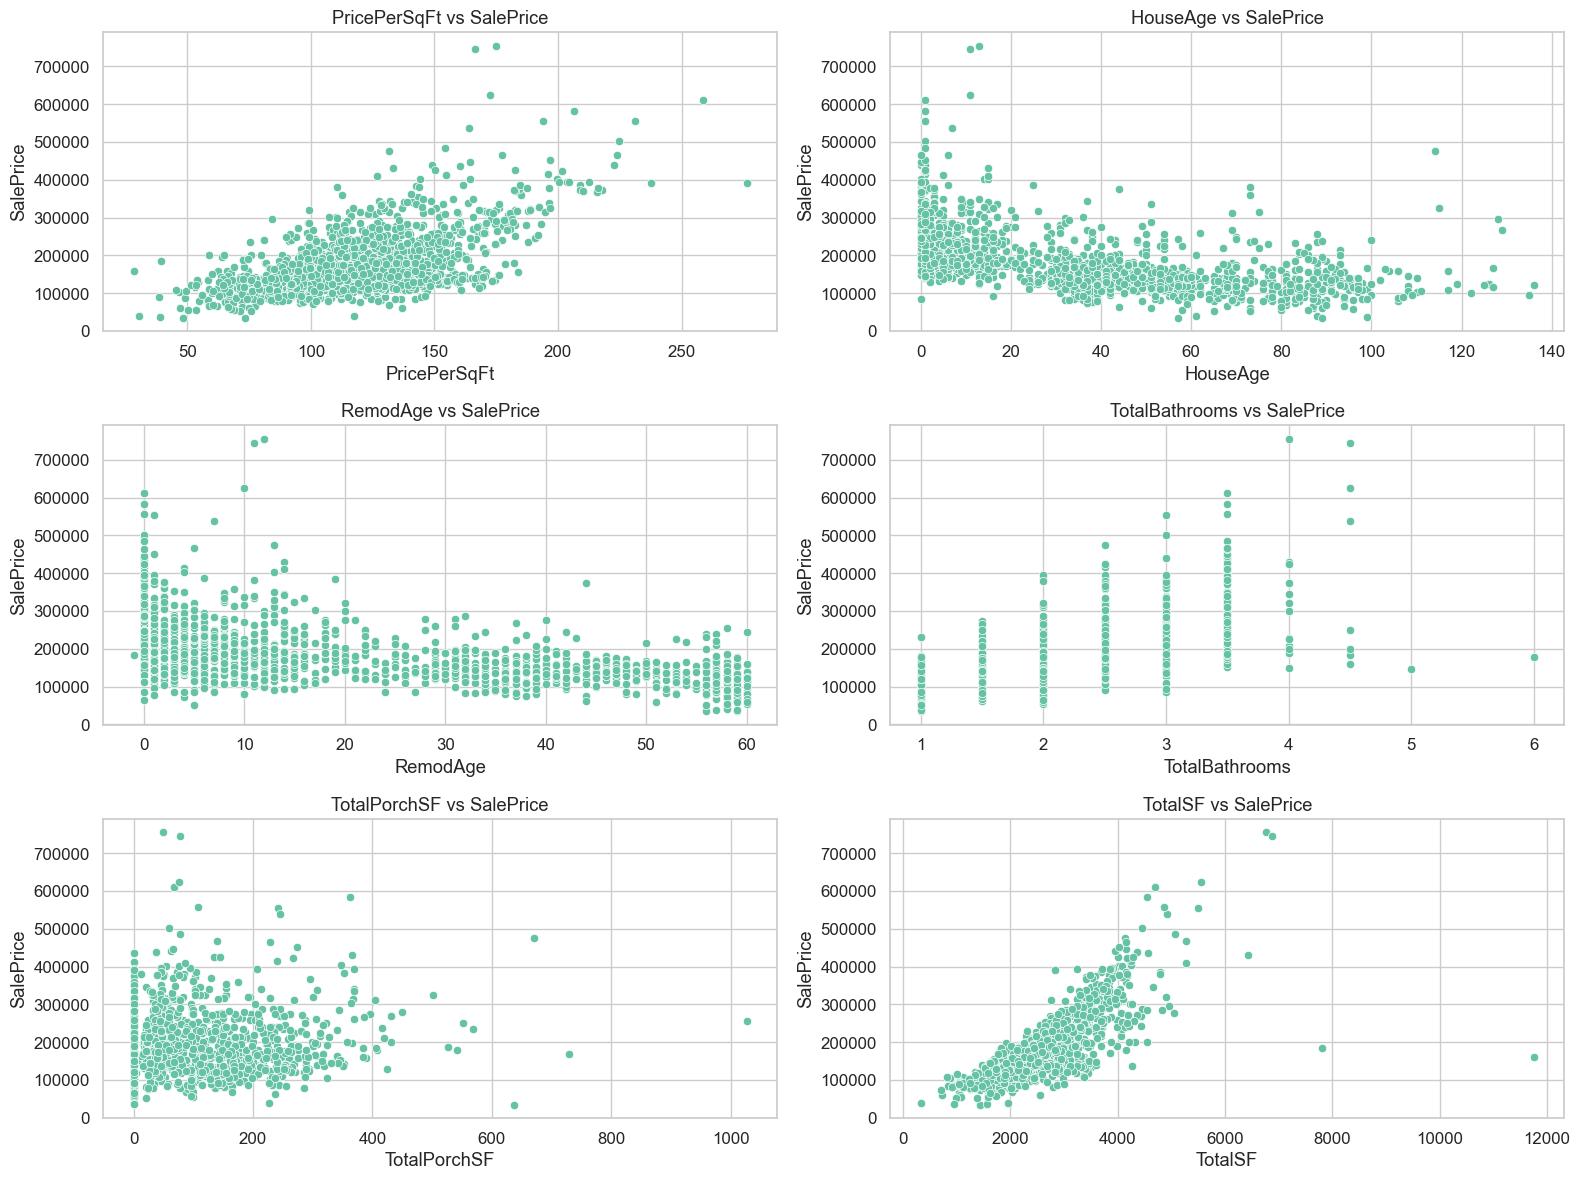

SalePrice         1.000000
TotalSF           0.782260
TotalBathrooms    0.631731
PricePerSqFt      0.575505
TotalPorchSF      0.195739
RemodAge         -0.509079
HouseAge         -0.523350
Name: SalePrice, dtype: float64


In [410]:
# Scatter plots for new features vs SalePrice
features = ['PricePerSqFt', 'HouseAge', 'RemodAge', 'TotalBathrooms', 'TotalPorchSF', 'TotalSF']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=df, x=feature, y='SalePrice')
    plt.title(f'{feature} vs SalePrice')
    plt.tight_layout()

plt.show()
# Correlation of new features with SalePrice
correlation = df[['SalePrice', 'PricePerSqFt', 'HouseAge', 'RemodAge', 'TotalBathrooms', 'TotalPorchSF', 'TotalSF']].corr()
print(correlation['SalePrice'].sort_values(ascending=False))


### 7. Feature Engineering and Size Impact

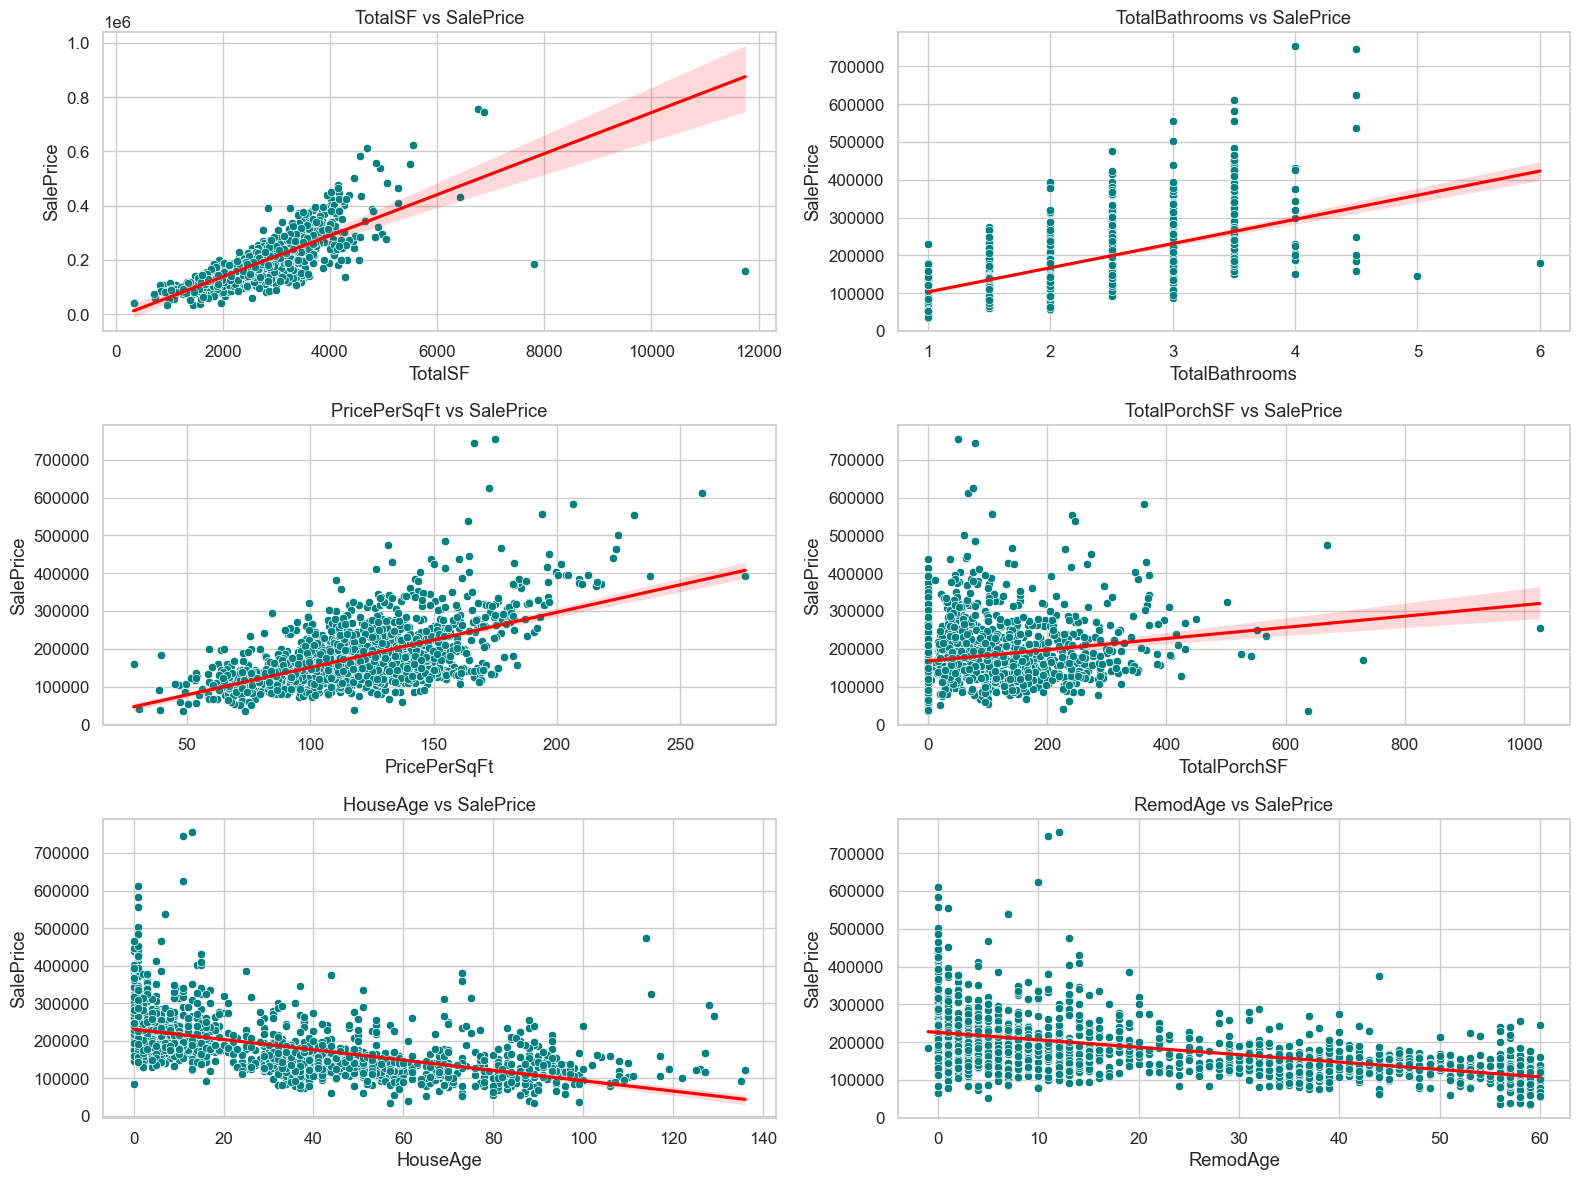

In [411]:
# Features to visualize against SalePrice
features = ['TotalSF', 'TotalBathrooms', 'PricePerSqFt', 'TotalPorchSF', 'HouseAge', 'RemodAge']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(data=df, x=feature, y='SalePrice', color='teal')
    sns.regplot(data=df, x=feature, y='SalePrice', scatter=False, color='red')
    plt.title(f'{feature} vs SalePrice')

plt.tight_layout()
plt.show()


### 8.Market Trends and Historical Pricing

In [412]:
print(df['MoSold'])

0        3
1        8
2       11
3        3
4        2
        ..
1455     1
1456     3
1457     8
1458     0
1459     6
Name: MoSold, Length: 1460, dtype: int32


C:\Users\mohan\AppData\Local\Temp\ipykernel_11828\1358960308.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YrSold', y='SalePrice', data=df, ci=None, palette="Blues_d")
C:\Users\mohan\AppData\Local\Temp\ipykernel_11828\1358960308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='YrSold', y='SalePrice', data=df, ci=None, palette="Blues_d")


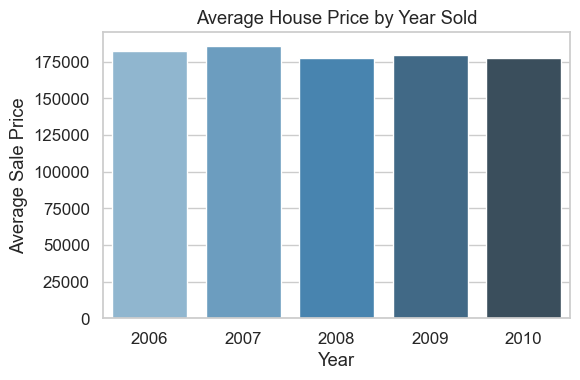

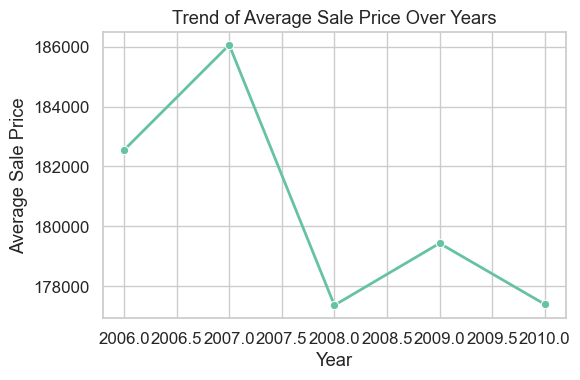

In [413]:
# ---------- 1. Average Sale Price by Year ----------
plt.figure(figsize=(6, 4))
sns.barplot(x='YrSold', y='SalePrice', data=df, ci=None, palette="Blues_d")
plt.title("Average House Price by Year Sold")
plt.ylabel("Average Sale Price")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# ---------- 2. Yearly Trend Line (Optional: Add Rolling Avg) ----------
yearly_avg = df.groupby('YrSold')['SalePrice'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.lineplot(data=yearly_avg, x='YrSold', y='SalePrice', marker='o', linewidth=2)
plt.title("Trend of Average Sale Price Over Years")
plt.ylabel("Average Sale Price")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


### 9.Customer Preferences and Amenities

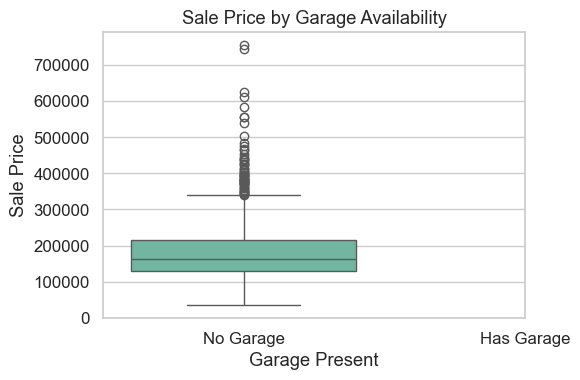

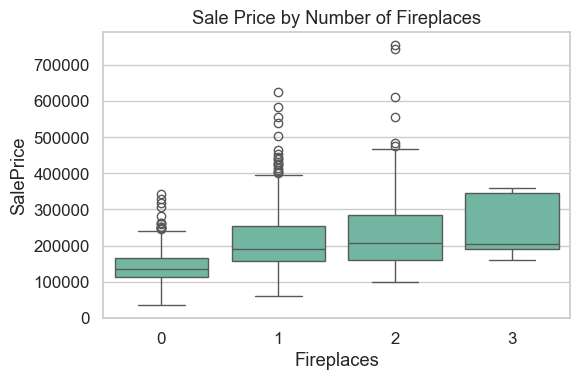

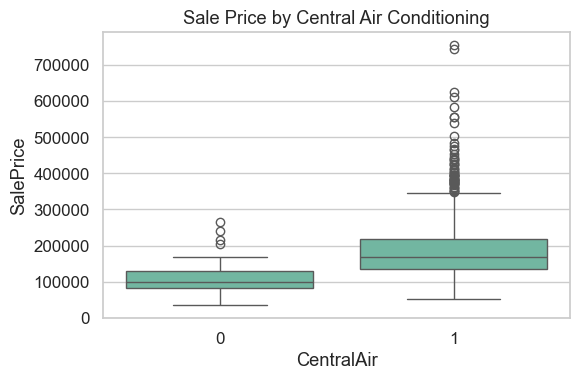

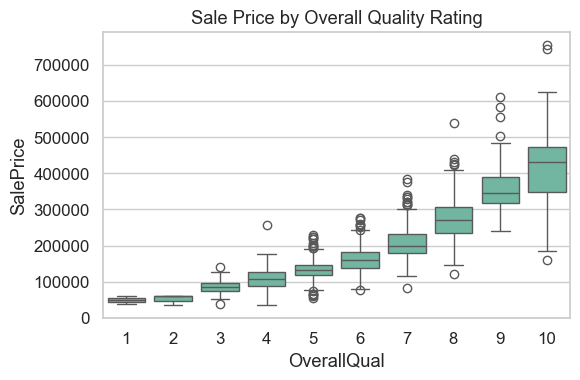

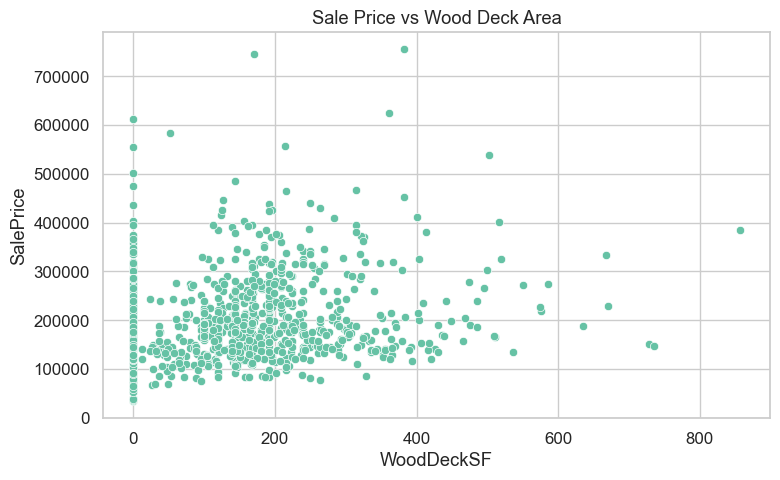

In [414]:
# ---------- 1. Garage Presence vs SalePrice ----------
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['GarageType'].notna(), y=df['SalePrice'])
plt.xticks([0, 1], ['No Garage', 'Has Garage'])
plt.title("Sale Price by Garage Availability")
plt.ylabel("Sale Price")
plt.xlabel("Garage Present")
plt.tight_layout()
plt.show()

# ---------- 2. Fireplace Count vs SalePrice ----------
plt.figure(figsize=(6, 4))
sns.boxplot(x='Fireplaces', y='SalePrice', data=df)
plt.title("Sale Price by Number of Fireplaces")
plt.tight_layout()
plt.show()

# ---------- 3. Central Air vs SalePrice ----------
plt.figure(figsize=(6, 4))
sns.boxplot(x='CentralAir', y='SalePrice', data=df)
plt.title("Sale Price by Central Air Conditioning")
plt.tight_layout()
plt.show()

# ---------- 4. Overall Quality vs SalePrice ----------
plt.figure(figsize=(6, 4))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("Sale Price by Overall Quality Rating")
plt.tight_layout()
plt.show()

# ---------- 5. Deck Area vs SalePrice ----------
plt.figure(figsize=(8, 5))
sns.scatterplot(x='WoodDeckSF', y='SalePrice', data=df)
plt.title("Sale Price vs Wood Deck Area")
plt.tight_layout()
plt.show()


### 10.Outliers Processing(Find and Removal)

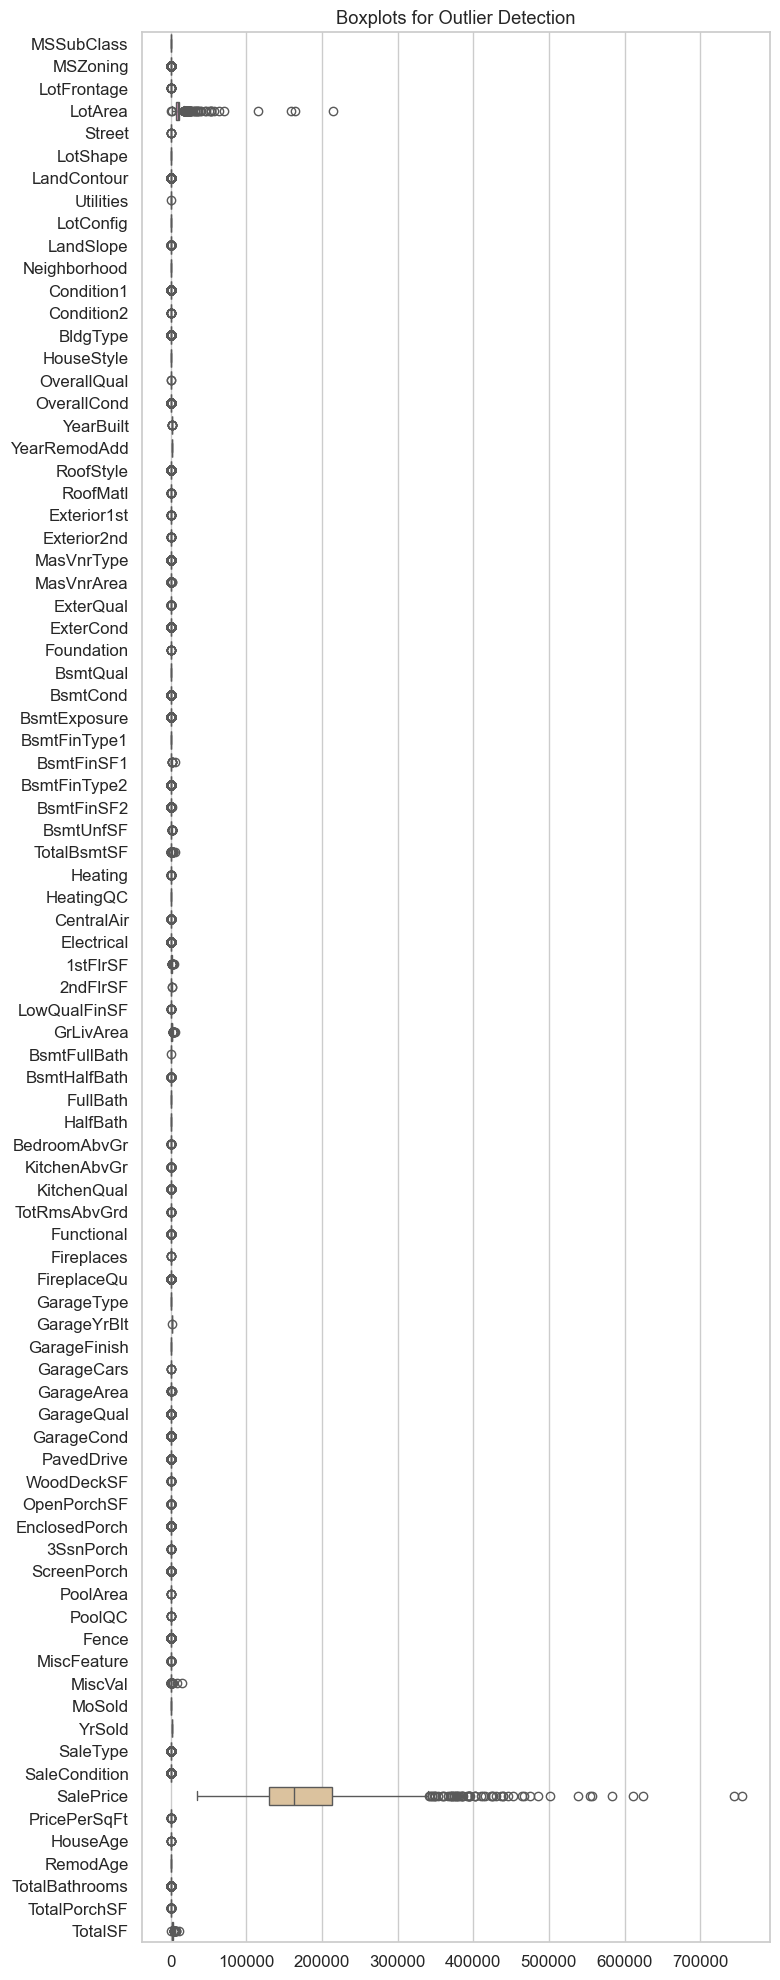

In [415]:
# Find Outliers 
plt.figure(figsize=(8,20))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title("Boxplots for Outlier Detection")
plt.tight_layout()
plt.show()

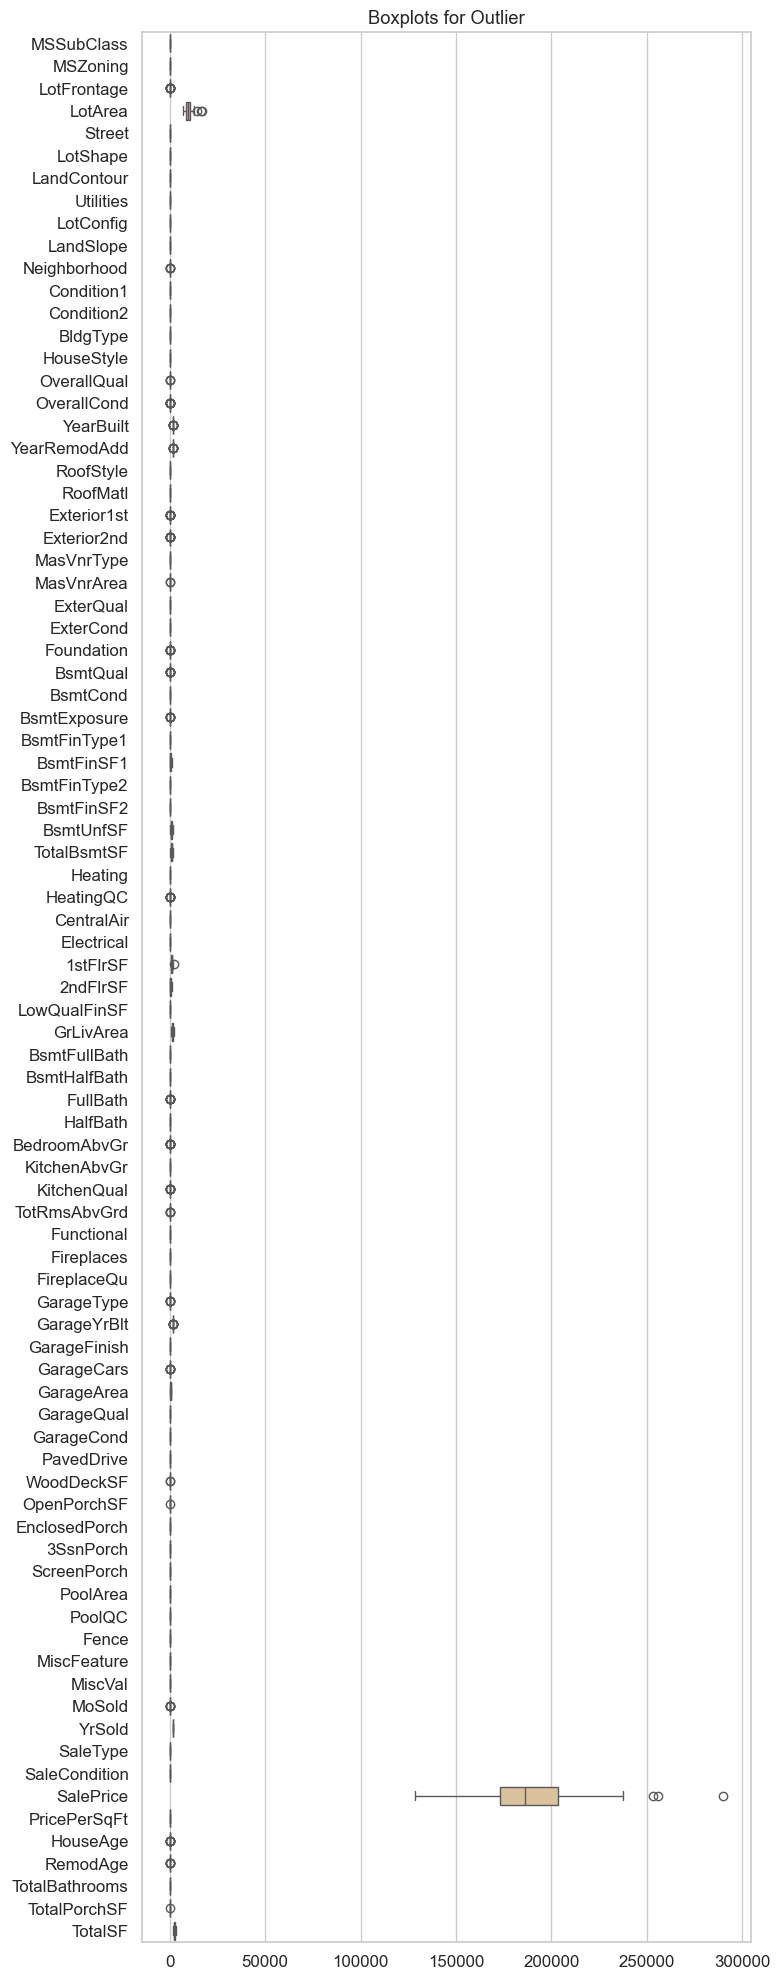

In [416]:
# Remove Outliers Using IQR
def remove_outliers_iqr(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include='number')
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return numeric_df[~((numeric_df < lower) | (numeric_df > upper)).any(axis=1)]

df1_clean = remove_outliers_iqr(df)
plt.figure(figsize=(8,20))
sns.boxplot(data=df1_clean, orient='h', palette='Set2')
plt.title("Boxplots for Outlier")
plt.tight_layout()
plt.show()